In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math


In [13]:
data = pd.read_csv('train.csv')

In [14]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [21]:
X_train[:,0].shape

(784,)

In [22]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / (sum(np.exp(Z)))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [23]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [24]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[2 2 2 ... 4 4 7] [0 2 8 ... 2 0 7]
0.1155609756097561
Iteration:  10
[3 3 0 ... 5 4 7] [0 2 8 ... 2 0 7]
0.14785365853658536
Iteration:  20
[0 3 0 ... 5 4 7] [0 2 8 ... 2 0 7]
0.17982926829268292
Iteration:  30
[0 3 0 ... 5 9 7] [0 2 8 ... 2 0 7]
0.21534146341463414
Iteration:  40
[0 3 0 ... 5 9 7] [0 2 8 ... 2 0 7]
0.25897560975609757
Iteration:  50
[0 2 0 ... 5 9 7] [0 2 8 ... 2 0 7]
0.320609756097561
Iteration:  60
[0 2 0 ... 5 9 7] [0 2 8 ... 2 0 7]
0.3816829268292683
Iteration:  70
[0 2 1 ... 5 9 7] [0 2 8 ... 2 0 7]
0.43785365853658537
Iteration:  80
[0 2 1 ... 2 3 7] [0 2 8 ... 2 0 7]
0.4912682926829268
Iteration:  90
[0 2 1 ... 2 8 7] [0 2 8 ... 2 0 7]
0.5316341463414634
Iteration:  100
[0 2 2 ... 2 8 7] [0 2 8 ... 2 0 7]
0.563390243902439
Iteration:  110
[0 2 2 ... 2 5 7] [0 2 8 ... 2 0 7]
0.5933414634146341
Iteration:  120
[0 2 2 ... 2 5 7] [0 2 8 ... 2 0 7]
0.6160975609756097
Iteration:  130
[0 2 2 ... 2 5 7] [0 2 8 ... 2 0 7]
0.6370731707317073
Iteration:  14

In [25]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [0]
Label:  0


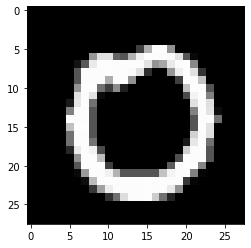

Prediction:  [2]
Label:  2


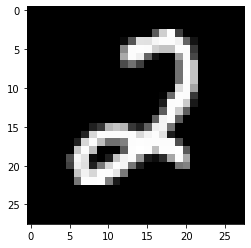

Prediction:  [7]
Label:  7


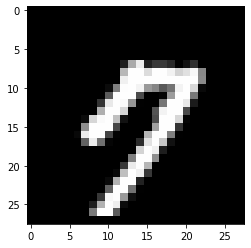

Prediction:  [5]
Label:  5


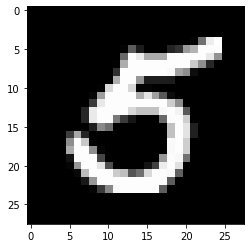

Prediction:  [3]
Label:  3


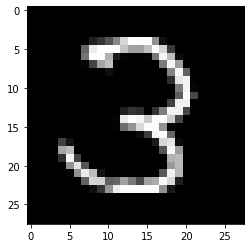

Prediction:  [2]
Label:  2


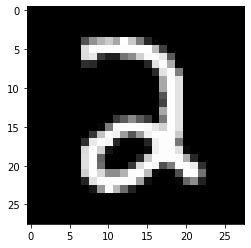

In [30]:
test_prediction(6,W1,b1,W2,b2)
test_prediction(7,W1,b1,W2,b2)
test_prediction(8,W1,b1,W2,b2)
test_prediction(10,W1,b1,W2,b2)
test_prediction(11,W1,b1,W2,b2)
test_prediction(13,W1,b1,W2,b2)

In [31]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[3 5 2 3 2 3 2 1 3 2 4 5 6 8 4 9 8 1 7 9 3 6 0 1 7 8 5 2 2 0 0 9 9 2 8 9 6
 9 0 7 4 5 5 5 1 1 4 3 5 2 5 6 2 1 5 3 1 1 3 2 4 7 7 3 5 9 5 8 2 6 6 9 3 0
 8 0 7 1 6 6 2 3 3 1 7 5 0 5 8 7 8 9 7 1 2 6 3 0 3 3 8 2 8 1 0 1 2 0 8 1 8
 8 7 9 2 0 9 9 6 4 7 4 9 2 1 9 9 0 2 2 8 8 3 3 3 9 4 1 9 7 0 9 0 0 2 9 7 4
 2 9 3 1 6 8 1 1 4 4 8 1 9 6 3 1 3 1 5 3 2 7 3 0 1 2 7 9 1 8 0 4 4 6 9 5 0
 9 9 7 9 3 1 7 6 1 5 6 1 2 1 9 9 2 4 3 8 2 5 6 7 9 0 1 9 9 0 8 1 6 1 2 6 3
 7 6 7 5 0 2 1 2 7 2 4 8 0 7 6 6 3 3 1 6 5 1 6 9 1 1 9 7 0 3 7 8 6 0 2 9 7
 2 7 6 1 7 5 2 8 2 6 8 6 4 9 8 0 5 1 0 3 9 4 6 2 7 5 4 6 0 4 3 0 4 7 4 8 7
 0 0 6 6 5 4 8 9 1 9 0 5 0 9 9 9 8 5 7 3 1 3 3 8 8 7 9 3 4 7 9 3 0 0 6 0 7
 6 3 7 1 3 7 4 1 9 4 7 7 8 9 8 2 8 4 8 9 1 7 7 4 4 0 7 6 3 3 1 7 1 8 3 3 9
 3 2 0 4 7 9 2 5 9 8 5 9 3 1 2 6 7 2 1 9 4 1 3 8 5 3 1 8 4 4 2 3 7 1 4 1 2
 4 3 0 3 1 3 4 5 9 9 2 2 6 3 6 4 4 9 8 7 5 1 7 8 6 8 7 0 7 8 2 2 6 1 4 2 4
 3 3 5 2 6 6 4 8 8 4 3 3 0 3 3 0 6 2 9 9 4 8 2 0 8 5 6 7 1 6 3 1 7 2 0 3 8
 7 6 7 8 2 5 0 2 4 2 4 9 

0.85